In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [148]:
file = pd.read_csv(filepath_or_buffer='cleaned.csv')
file.head(1)

,Unnamed: 0,사업지역(시군구),포획일자,포획장소,털색,몸무게(kg),품종,연령,성별,건강상태,특이사항,상태,TNR일자,TNR병원,방사일자,방사장소,종결정보,장소일치여부
0,0,중구,2024-05-01,시청,밤갈색,4.87,한국고양이,3살,수컷,양호,없슴,방사,2024-05-01,대구시수의사회(동산),2024-05-03,시청,-,False


In [149]:
data = pd.read_csv('cleaned.csv', usecols=[1,2,5,6,7,8,9,11,12,14,16])
data.head(1)

,사업지역(시군구),포획일자,몸무게(kg),품종,연령,성별,건강상태,상태,TNR일자,방사일자,종결정보
0,중구,2024-05-01,4.87,한국고양이,3살,수컷,양호,방사,2024-05-01,2024-05-03,-


In [150]:
col = 1
date_dict = {}
k=0

for k in range(data.shape[0]):
    if data.iloc[k][col][:7] in date_dict.keys():
        date_dict[data.iloc[k][col][:7]] += 1
    else:
        date_dict[data.iloc[k][col][:7]] = 1
date_dict = dict(sorted(date_dict.items()))

k_list = list(date_dict.keys())
v_list = list(date_dict.values())

In [151]:
monthly_dict = {}
for key in k_list :
    monthly_dict[key] = []
monthly_dict 

{'2023-04': [],
 '2023-05': [],
 '2023-06': [],
 '2023-07': [],
 '2023-08': [],
 '2023-09': [],
 '2023-10': [],
 '2023-11': [],
 '2023-12': [],
 '2024-02': [],
 '2024-03': [],
 '2024-04': [],
 '2024-05': []}

In [152]:
for k in range(data.shape[0]):
    if data.iloc[k][col][:7] in date_dict.keys():
        sample_list = []
        for i in [0, 2, 3, 4, 5,6,7,10]:
            sample_list.append(data.iloc[k][i])
        monthly_dict[data.iloc[k][1][:7]].append(sample_list)

In [163]:
monthly_dict

{'2023-04': [['남구', 3.03, '코숏', '3살', '수컷', '양호', '방사', '-'],
  ['달서구', 2.8, '믹스', '2살', '암컷', '양호', '방사', '-'],
  ['수성구', 3.53, '코숏', '2살', '암컷', '양호', '방사', '-'],
  ['수성구', 5.13, '코숏', '2살', '수컷', '양호', '방사', '-'],
  ['서구', 4.6, '코숏', '2살', '수컷', '양호', '방사', '-'],
  ['서구', 3.3, '코숏', '1살', '암컷', '양호', '방사', '-'],
  ['수성구', 3.4, '코숏', '2살', '암컷', '양호', '방사', '-'],
  ['수성구', 4.24, '코숏', '4살', '암컷', '양호', '방사', '-'],
  ['수성구', 2.53, '코숏', '6개월 - 1살', '암컷', '양호', '방사', '-'],
  ['군위군', 3.8, '코숏', '0 - 6개월', '암컷', '양호', '방사', '-'],
  ['수성구', 3.8, '코숏', '3살', '암컷', '양호', '방사', '-'],
  ['달성군', 4.0, '한국고양이', '3살', '암컷', '양호', '방사', '-'],
  ['달서구', 2.8, '코숏', '1살', '암컷', '치료요함', '방사', '-'],
  ['달서구', 2.5, '코숏', '1살', '수컷', '양호', '방사', '-'],
  ['달성군', 4.1, '믹스', '2살', '수컷', '양호', '방사', '-'],
  ['중구', 4.2, '믹스', '2살', '수컷', '양호', '방사', '-'],
  ['달성군', 5.0, '한국고양이', '2살', '수컷', '양호', '방사', '-'],
  ['중구', 3.2, '한국고양이', '6개월 - 1살', '수컷', '양호', '방사', '-'],
  ['서구', 4.5, '코숏', '3살', '수컷', '양호', '방사',

<function matplotlib.pyplot.show(close=None, block=None)>

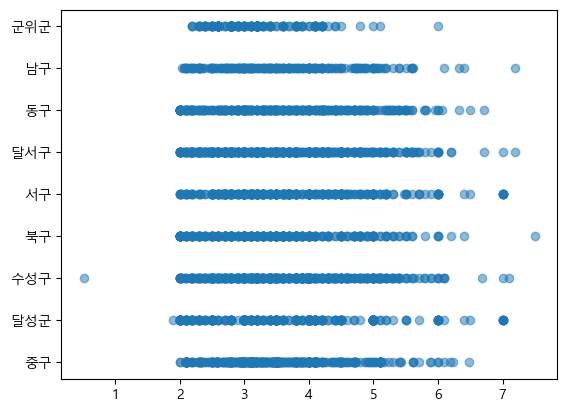

In [153]:
plt.scatter(data["몸무게(kg)"],data['사업지역(시군구)'] ,alpha = 0.5)
plt.show

In [154]:
data['연령'].unique()

array(['3살', '1살', '5살', '6살', '4살', '2살', '7살', '10살', '6개월 - 1살', '9살',
       '0 - 6개월', '8살', '추정불가'], dtype=object)

In [155]:
# 연령을 숫자로 변환
data.replace('추정불가', -1,inplace = True)
data.replace('0 - 6개월',0 ,inplace = True)
data.replace('6개월 - 1살', 0.5,inplace = True)
for k in range(1, 11):
    data.replace(f'{k}살', k,inplace = True)

data['연령'].unique()

array([ 3. ,  1. ,  5. ,  6. ,  4. ,  2. ,  7. , 10. ,  0.5,  9. ,  0. ,
        8. , -1. ])

In [156]:
data.corr(numeric_only=True)

,몸무게(kg),연령
몸무게(kg),1.000000,0.454655
연령,0.454655,1.000000


In [157]:
feature = data[['몸무게(kg)', '연령', '성별', '품종']]
target = data[['사업지역(시군구)']]

In [158]:
# 원핫 인코딩
feature = pd.get_dummies(feature)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. 로지스틱 회귀 모델 학습 및 평가
logistic_model = LogisticRegression(random_state=42, max_iter=200)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

Logistic Regression
Accuracy: 0.30
Classification Report:
              precision    recall  f1-score   support

         군위군       0.48      0.88      0.62        32
          남구       0.00      0.00      0.00        46
         달서구       0.20      0.28      0.23       131
         달성군       0.38      0.30      0.34       105
          동구       0.19      0.41      0.25        64
          북구       0.00      0.00      0.00        90
          서구       0.29      0.06      0.10        79
         수성구       0.28      0.43      0.34       101
          중구       0.48      0.52      0.50        96

    accuracy                           0.30       744
   macro avg       0.26      0.32      0.27       744
weighted avg       0.26      0.30      0.26       744

Confusion Matrix:
[[28  0  1  0  1  0  0  2  0]
 [ 2  0 19  0 10  0  0 15  0]
 [ 5  0 37 20 24  0  0 44  1]
 [ 0  0 24 32 21  0  9  6 13]
 [ 0  0 19  2 26  0  0 17  0]
 [ 4  0 31 10 33  0  0 10  2]
 [ 8  0 15  0  7  0  5 16 28]
 [11  0 3

c:\ProgramData\anaconda3\envs\TORCH_NLP38\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\envs\TORCH_NLP38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\envs\TORCH_NLP38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\envs\TORCH_NLP38\lib\site-pa

In [160]:
# 2. k-최근접 이웃 모델 학습 및 평가
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("\nK-Nearest Neighbors")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors
Accuracy: 0.36
Classification Report:
              precision    recall  f1-score   support

         군위군       0.75      0.84      0.79        32
          남구       0.10      0.11      0.11        46
         달서구       0.35      0.36      0.35       131
         달성군       0.42      0.46      0.44       105
          동구       0.21      0.22      0.21        64
          북구       0.31      0.28      0.29        90
          서구       0.24      0.20      0.22        79
         수성구       0.33      0.33      0.33       101
          중구       0.56      0.54      0.55        96

    accuracy                           0.36       744
   macro avg       0.36      0.37      0.37       744
weighted avg       0.36      0.36      0.36       744

Confusion Matrix:
[[27  0  2  0  0  1  1  1  0]
 [ 0  5 12  4  5  5  2 11  2]
 [ 3  8 47 15 12 11  8 23  4]
 [ 0  4 16 48 11  9  5  2 10]
 [ 0  8 12  5 14  8  4 10  3]
 [ 2  4 16 13 12 25  7  8  3]
 [ 2  4 13 10  5  5 16 11 13]
 [ 2 10 

c:\ProgramData\anaconda3\envs\TORCH_NLP38\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [161]:
# 3. 랜덤 포레스트 모델 학습 및 평가
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

c:\ProgramData\anaconda3\envs\TORCH_NLP38\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest
Accuracy: 0.37
Classification Report:
              precision    recall  f1-score   support

         군위군       0.68      0.84      0.75        32
          남구       0.17      0.17      0.17        46
         달서구       0.33      0.31      0.32       131
         달성군       0.47      0.48      0.47       105
          동구       0.16      0.19      0.17        64
          북구       0.28      0.31      0.29        90
          서구       0.32      0.27      0.29        79
         수성구       0.38      0.34      0.36       101
          중구       0.54      0.57      0.56        96

    accuracy                           0.37       744
   macro avg       0.37      0.39      0.38       744
weighted avg       0.37      0.37      0.37       744

Confusion Matrix:
[[27  0  2  0  0  1  1  1  0]
 [ 0  8 11  1  7  7  3  7  2]
 [ 3  6 40 18 18 12  5 24  5]
 [ 0  1 11 50  8 20  3  2 10]
 [ 1  6  9  3 12 11  7  6  9]
 [ 2  3 19 12  9 28  8  5  4]
 [ 5  4  7  7  4  9 21 10 12]
 [ 2 12 13  6 